<a href="https://colab.research.google.com/github/kishlayaug15/Neural-Networks/blob/main/GANs_intro_using_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


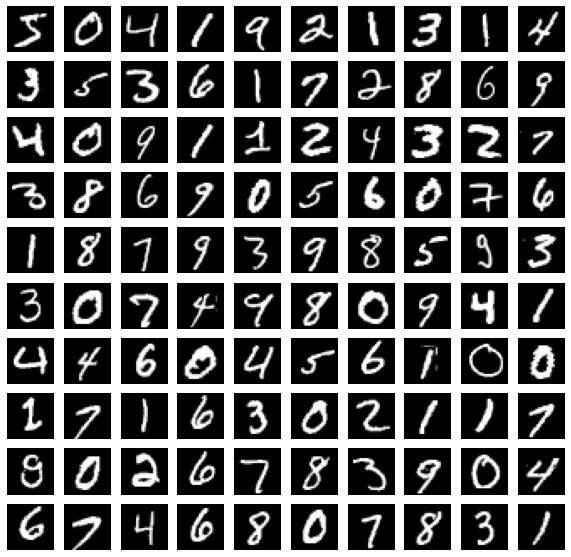

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.axis('off')
  plt.imshow(X_train[i],cmap='gray')

In [ ]:
X_train = X_train/255

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size,drop_remainder = True).prefetch(1) #prefetch is used to provide data faster

In [ ]:
codings_size = 30 #also called random_noises provided to generator

generator = keras.models.Sequential([
            keras.layers.Dense(128,activation= 'selu',input_shape = [codings_size]),
            keras.layers.Dense(256,activation= 'selu'),
            keras.layers.Dense(28*28,activation= 'selu'),
            keras.layers.Reshape([28,28])
])

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               201488    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 238,480
Trainable params: 238,480
Non-trainable params: 0
_________________________________________________________________


In [ ]:
discriminator = keras.models.Sequential([
            keras.layers.Flatten(input_shape =[28,28]),                             
            keras.layers.Dense(256,activation= 'selu'),
            keras.layers.Dense(128,activation= 'selu'),
            keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 233,985
Trainable params: 233,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
gan = keras.models.Sequential([generator,discriminator])
gan.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28)            238480    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 233985    
Total params: 472,465
Trainable params: 472,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
discriminator.compile(loss='binary_crossentropy', optimizer='rmsprop')
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer='rmsprop')

In [ ]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs = 54):
  generator,discriminator = gan.layers
  for epoch in range(n_epochs):
    for X_batch in dataset:
      noise = tf.random.normal(shape = [batch_size,codings_size])
      generated_image = generator(noise)
      X_batch = tf.cast(X_batch,tf.float32)

      X_fake_and_real = tf.concat([generated_image,X_batch],axis=0)
      y1 = tf.constant([[0.]]*batch_size+[[1.]]*batch_size)

      discriminator.trainable = True
      discriminator.train_on_batch(X_fake_and_real,y1)

      noise = tf.random.normal(shape = [batch_size,codings_size])
      y2 = tf.constant([[1.]]*batch_size)

      discriminator.trainable = False
      gan.train_on_batch(noise,y2)

In [ ]:
train_gan(gan,dataset,batch_size,codings_size)

In [ ]:
noise = tf.random.normal(shape = [100,codings_size])
generated_images = generator(noise)
generated_images.shape

TensorShape([100, 28, 28])

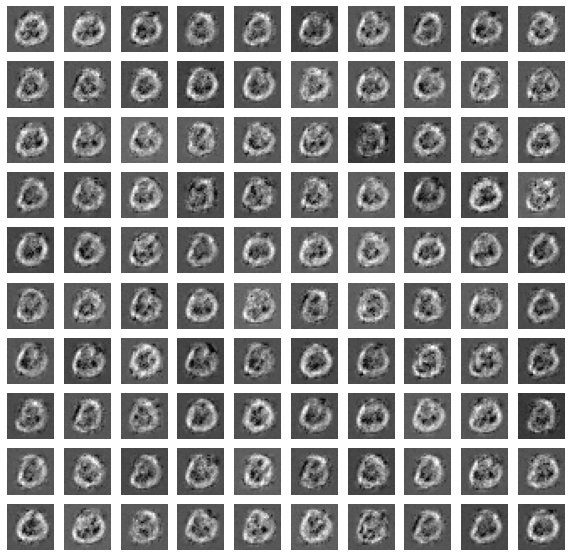

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.axis('off')
  plt.imshow(generated_images[i],cmap='gray')